In [1]:
import torch
import numpy as np
import cv2
import tensorflow as tf
from modelos.keypoint import KeypointDetectorModel
from matplotlib import pyplot as plt
from common.homography import visualize, _points_from_mask, denormalize
from common.translation import get_players, draw_template

C:\Users\itzca\.pyenv\pyenv-win\versions\3.7.9\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

image = cv2.imread('media/cap.jpg')
image = cv2.resize(image, (1024, 1024))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

template = cv2.imread('media/template.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
template = cv2.resize(template, (1280,720))/255.
template_copy = template

Using cache found in C:\Users\itzca/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-1 Python-3.7.9 torch-1.13.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
kp_model = KeypointDetectorModel(backbone='efficientnetb3', num_classes=29, input_shape=(512, 512),)

WEIGHTS_PATH = ("models/keypoint_detector.h5")
WEIGHTS_NAME = "keypoint_detector.h5"
WEIGHTS_TOTAR = False

checkpoints = tf.keras.utils.get_file(WEIGHTS_NAME, WEIGHTS_PATH, WEIGHTS_TOTAR,)

kp_model.load_weights(checkpoints)

Succesfully loaded weights from C:\Users\itzca\.keras\datasets\keypoint_detector.h5


In [4]:
pr_mask = kp_model(image)
visualize(image=denormalize(image.squeeze()),pr_mask=pr_mask[..., -1].squeeze(),)
src,dst = _points_from_mask(pr_mask[0])
M, _ = cv2.findHomography(src, dst, cv2.RANSAC, 5)
print(M)

[[    0.35858     0.75771      315.45]
 [    0.31473       2.307     -275.22]
 [-1.9292e-05   0.0046291           1]]


C:\Users\itzca\OneDrive\Documents\Tracker\common\homography.py:47: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [6]:
detecciones = model(cv2.resize(image, (512, 512)))
puntos = get_players(detecciones, image)
temp = draw_template(cv2.resize(template_copy, (320, 320)), puntos, M)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

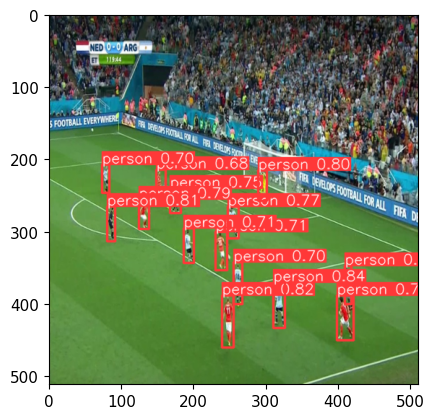

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(detecciones.render()))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


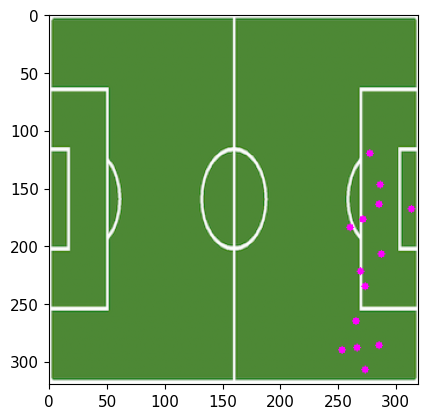

In [13]:
plt.imshow(temp)
plt.show()